In [1]:
%matplotlib inline

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import cmocean as co
import pandas as pd
sns.set_palette("colorblind")
# sns.set()


In [26]:
# Project path
project_path = Path.cwd() / '..' / '..' 
project_path = project_path.resolve()

# transport csv datafiles
path_data = Path('data/processed/transports/') 
filenameGI = 'Greenland-Iceland_transports_2014-16.csv'
filenameIF = 'Iceland-Faroe_transports_2014-16.csv'
filenameFS = 'Faroe-Shetland_transports_2014-16.csv'

# output figure path
path_figures = Path('reports/figures/transports/') 
outfile = '008_afox_plot_transport_timeseries.png'



In [3]:
greice = pd.read_csv(project_path / path_data / filenameGI,header=1)
icefar = pd.read_csv(project_path / path_data / filenameIF,header=1)
farshe = pd.read_csv(project_path / path_data / filenameFS,header=1)


greice['Date']= pd.to_datetime(greice['Date'])
greice.set_index('Date', inplace=True)
icefar['Date']= pd.to_datetime(icefar['Date'])
icefar.set_index('Date', inplace=True)
farshe['Date']= pd.to_datetime(farshe['Date'])
farshe.set_index('Date', inplace=True)

totals = greice.add(icefar,fill_value=0)
totals = totals.add(farshe,fill_value=0)

In [4]:
greice

,Total,Goes South,From South goes East,From Atlantic to Norwegian Sea,and from Rockall Trough,or from west of Rockall
Date,,,,,,
2014-06-16,-2.704,-3.782,0.913,0.849,0.014,0.792
2014-12-16,-6.517,-6.784,0.277,0.230,0.013,0.202
2015-06-16,-3.782,-4.660,0.839,0.743,0.035,0.622
2015-12-16,-6.601,-6.889,0.454,0.338,0.000,0.325
2016-06-16,-2.598,-3.441,0.767,0.719,0.034,0.652
2016-12-16,-6.259,-6.978,0.787,0.722,0.015,0.682


In [5]:
icefar

,Total,From N Iceland,NOT from N Iceland,From Atlantic to Norwegian Sea,and from Rockall Trough,or from west of Rockall
Date,,,,,,
2014-06-16,2.253,-0.099,2.352,2.261,0.463,1.720
2014-12-16,3.540,0.544,2.996,2.573,0.032,2.424
2015-06-16,2.303,0.222,2.082,1.951,0.142,1.663
2015-12-16,4.325,0.521,3.804,3.259,0.446,2.741
2016-06-16,2.314,-0.346,2.660,2.214,0.189,1.987
2016-12-16,3.140,0.596,2.544,2.360,0.048,2.296


In [6]:
farshe

,Total,From N Faroe,NOT from N Faroe,From Atlantic to Norwegian Sea,and from Rockall Trough,or from west of Rockall
Date,,,,,,
2014-06-16,1.482,-1.559,3.041,3.000,2.231,0.646
2014-12-16,4.128,-0.139,4.267,4.159,3.552,0.507
2015-06-16,2.382,-1.123,3.504,3.466,2.611,0.505
2015-12-16,4.434,-1.356,5.790,5.692,4.394,1.037
2016-06-16,1.460,-1.883,3.303,3.303,2.954,0.234
2016-12-16,4.802,-0.618,5.420,5.277,4.134,1.045


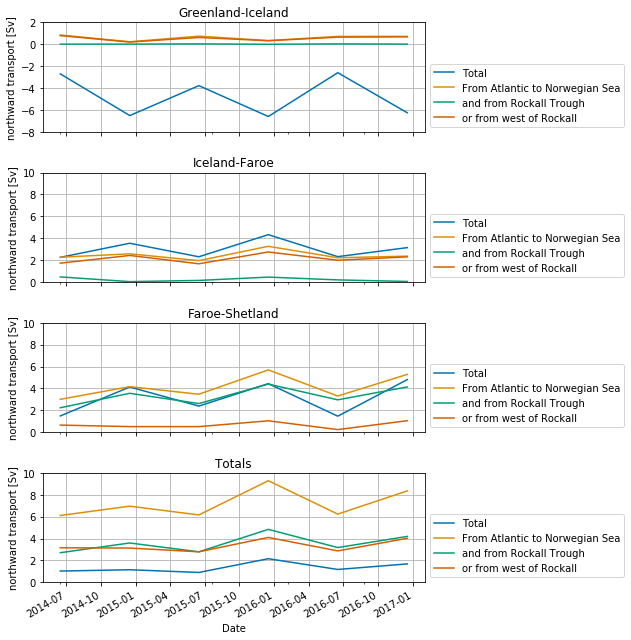

In [32]:
fig,ax = plt.subplots(4,figsize = (9,9),sharex=True)
greice.plot.line(ax=ax[0],y=['Total','From Atlantic to Norwegian Sea','and from Rockall Trough','or from west of Rockall'])
ax[0].legend(loc='lower left', bbox_to_anchor=(1.0, 0., 0, 1.0))
ax[0].grid()
ax[0].set_ylabel('northward transport [Sv]')
ax[0].set_title('Greenland-Iceland')
ax[0].set_ylim(-8,2)
icefar.plot.line(ax=ax[1],y=['Total','From Atlantic to Norwegian Sea','and from Rockall Trough','or from west of Rockall'])
ax[1].legend(loc='lower left', bbox_to_anchor=(1.0, 0., 0, 1.0))
ax[1].grid()
ax[1].set_ylabel('northward transport [Sv]')
ax[1].set_title('Iceland-Faroe')
ax[1].set_ylim(0,10)
farshe.plot.line(ax=ax[2],y=['Total','From Atlantic to Norwegian Sea','and from Rockall Trough','or from west of Rockall'])
ax[2].legend(loc='lower left', bbox_to_anchor=(1.0, 0., 0, 1.0))
ax[2].grid()
ax[2].set_ylabel('northward transport [Sv]')
ax[2].set_title('Faroe-Shetland')
ax[2].set_ylim(0,10)
totals.plot.line(ax=ax[3],y=['Total','From Atlantic to Norwegian Sea','and from Rockall Trough','or from west of Rockall'])
ax[3].legend(loc='lower left', bbox_to_anchor=(1.0, 0., 0, 1.0))
ax[3].grid()
ax[3].set_ylabel('northward transport [Sv]')
ax[3].set_title('Totals')
ax[3].set_ylim(0,10)
# plt.show()
plt.tight_layout()
plt.savefig(project_path / path_figures / outfile)